In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip


## まずはなるべく自力でやってみる

- データの読み込み
- 内容の確認

In [4]:
df_train = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip')
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

- 説明変数：隠ぺい変数（X0 - X385)

> This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

内容は秘匿されているが、それぞれ一台の車のあるパラメータを示している。例：4WDかどうか、エアーサスペンションの有無、ヘッドアップディスプレイ？

- 目的変数：

> The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

各変数に対するテストをパスするための時間を目的変数としている。短いほどいい？

# 目的変数をチェックしていく

- どんな分布を持っているのか
- 外れ値の様子

In [6]:
df_train.y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [ ]:
!pip install ptitprince

In [12]:
import ptitprince as pt
import matplotlib.pyplot as plt

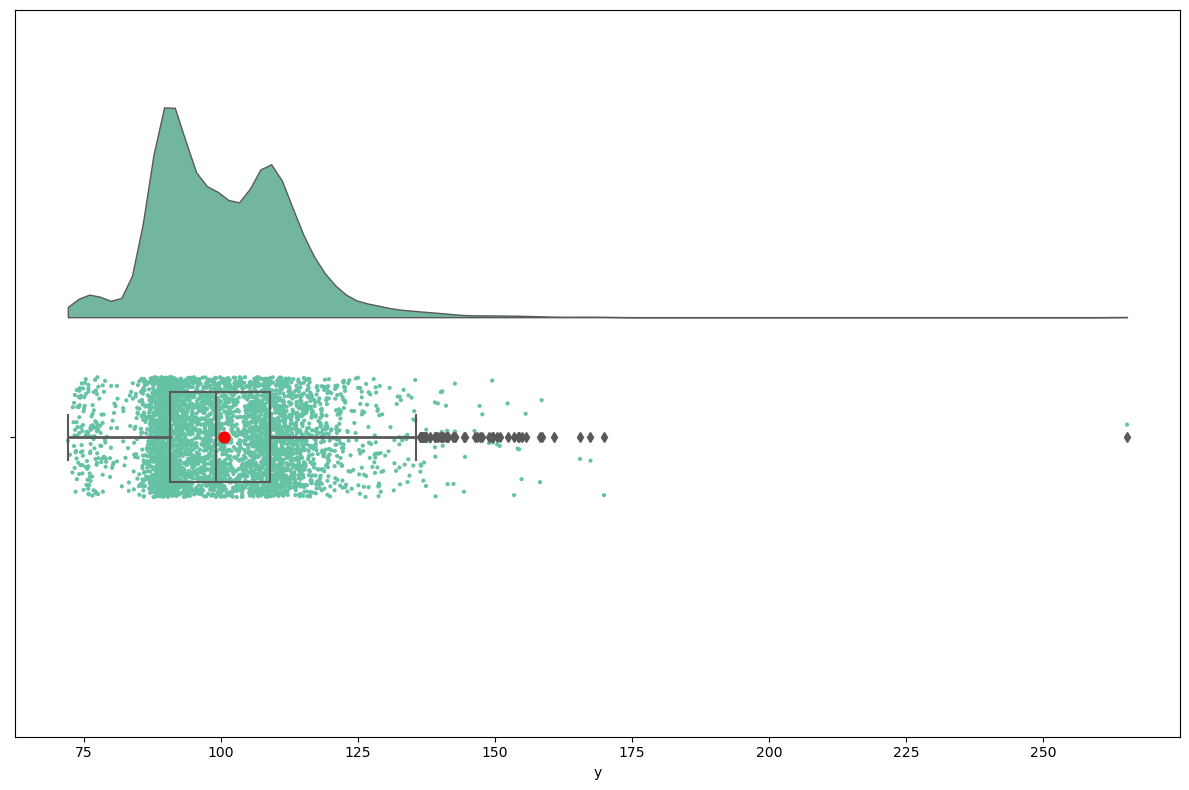

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
pt.RainCloud(ax=ax, y="y", data=df_train, orient="h", pointplot=True)
fig.tight_layout()

ちょっとだけ外れ値がある？

拡大してみる

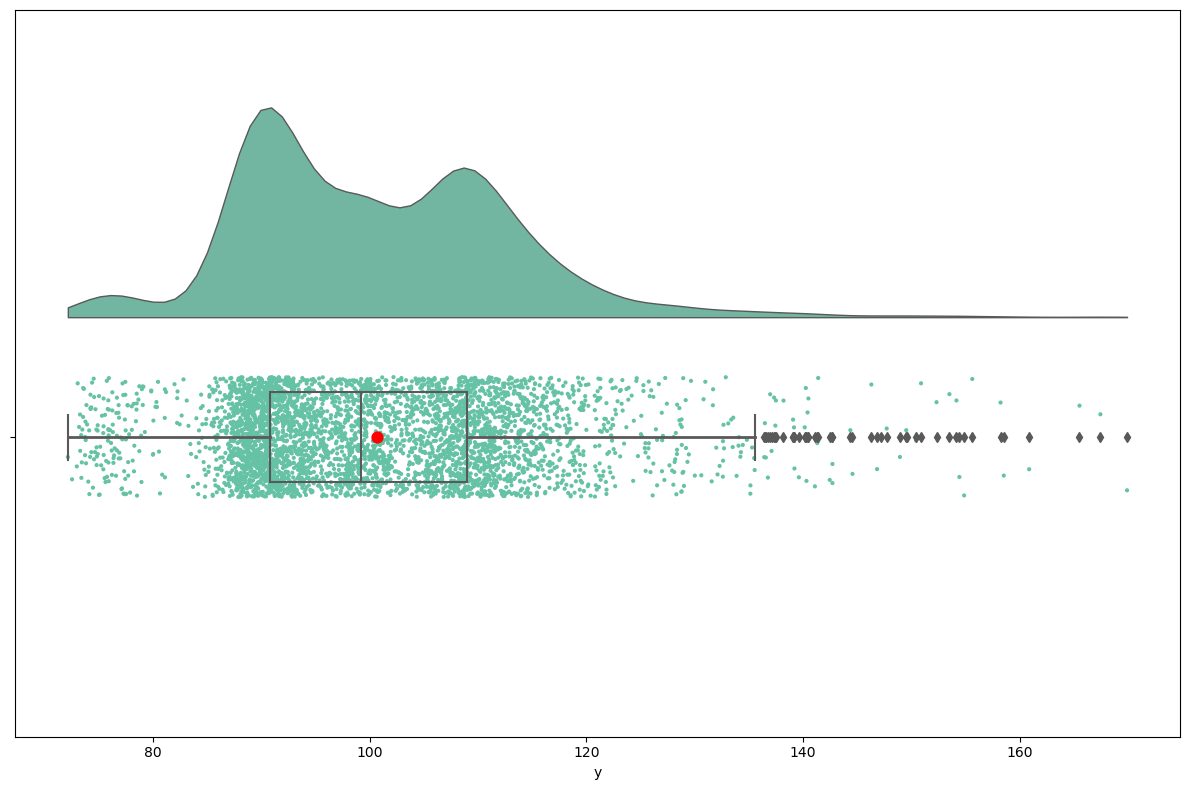

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
pt.RainCloud(ax=ax, y="y", data=df_train.sort_values('y')[:-1], orient="h", pointplot=True)
fig.tight_layout()

# 目的変数をチェックしていく

In [21]:
columns_x = [col for col in df_train.columns if col.startswith('X')]
print(len(columns_x), columns_x[:3], columns_x[-3:])

376 ['X0', 'X1', 'X2'] ['X383', 'X384', 'X385']


In [31]:
ser.isnull().sum()

0

In [35]:
tmp = []
for col in columns_x:
    ser = df_train[col]
    tmp.append({
        'name' : ser.name,
        'dtype' : str(ser.dtype),
        'n_unique' : len(ser.unique()),
        'n_null' : ser.isnull().sum(),
    })
df_categ = pd.DataFrame(tmp)

In [36]:
df_categ

,name,dtype,n_unique,n_null
0,X0,object,47,0
1,X1,object,27,0
2,X2,object,44,0
3,X3,object,7,0
4,X4,object,4,0
...,...,...,...,...
371,X380,int64,2,0
372,X382,int64,2,0
373,X383,int64,2,0
374,X384,int64,2,0


In [38]:
df_categ['dtype'].unique()

array(['object', 'int64'], dtype=object)

説明変数は 文字列 or int

In [40]:
df_categ[df_categ['n_unique']==1]

,name,dtype,n_unique,n_null
9,X11,int64,1,0
89,X93,int64,1,0
103,X107,int64,1,0
225,X233,int64,1,0
227,X235,int64,1,0
260,X268,int64,1,0
281,X289,int64,1,0
282,X290,int64,1,0
285,X293,int64,1,0
289,X297,int64,1,0


これらは除外

In [41]:
df_categ[df_categ['n_unique']==2]

,name,dtype,n_unique,n_null
8,X10,int64,2,0
10,X12,int64,2,0
11,X13,int64,2,0
12,X14,int64,2,0
13,X15,int64,2,0
...,...,...,...,...
371,X380,int64,2,0
372,X382,int64,2,0
373,X383,int64,2,0
374,X384,int64,2,0


これらはboolみたいなもの？

In [46]:
for col in df_categ[df_categ['n_unique']==2].name:
    ser = df_train[col]
    if not list(ser.unique()) == [0,1] and not list(ser.unique()) == [1,0]:
        print(ser.name, ':', list(ser.unique()))

→ 全部 bool

In [54]:
columns_1_unique = df_categ[df_categ['n_unique']==1].name.values
columns_bool = df_categ[df_categ['n_unique']==2].name.values
columns_other = [col for col in columns_x if not (col in columns_1_unique or col in columns_bool)]
columns_other

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [58]:
df_categ.set_index('name').T[columns_other].T

,dtype,n_unique,n_null
name,,,
X0,object,47,0
X1,object,27,0
X2,object,44,0
X3,object,7,0
X4,object,4,0
X5,object,29,0
X6,object,12,0
X8,object,25,0


In [63]:
for col in columns_other:
    ser = df_train[col]
    print(col, sorted(ser.unique()))

X0 ['a', 'aa', 'ab', 'ac', 'ad', 'af', 'ai', 'aj', 'ak', 'al', 'am', 'ao', 'ap', 'aq', 'as', 'at', 'au', 'aw', 'ax', 'ay', 'az', 'b', 'ba', 'bc', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
X1 ['a', 'aa', 'ab', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z']
X2 ['a', 'aa', 'ac', 'ae', 'af', 'ag', 'ah', 'ai', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av', 'aw', 'ay', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'x', 'y', 'z']
X3 ['a', 'b', 'c', 'd', 'e', 'f', 'g']
X4 ['a', 'b', 'c', 'd']
X5 ['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'c', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 'u', 'v', 'w', 'x', 'y']
X6 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
X8 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 

これらの分け方に意味はなさそう。アルファベットを26進数として使っているだけ？一応a-z-aa-zzの順番でカテゴリ番号を振ってみる。

In [68]:
import string
cnt = 0
str_to_num = {}
num_to_str = {}
for s1 in string.ascii_lowercase:
    str_to_num[s1] = cnt
    num_to_str[cnt] = s1
    cnt += 1
    
for s1 in string.ascii_lowercase:
    for s2 in string.ascii_lowercase:
        str_to_num[s1+s2] = cnt
        num_to_str[cnt] = s1+s2
        cnt += 1
    if s1 == 'b':
        break
        
to_num = lambda s: str_to_num[s]
to_str = lambda n: num_to_str[n]

In [75]:
df_train_converted = df_train.copy()
for col in columns_other:
    df_train_converted[col] = df_train_converted[col].apply(to_num)
df_train_converted = df_train_converted.drop(columns_1_unique, axis=1)
df_train_converted

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,10,21,45,0,3,20,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,10,19,47,4,3,24,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,51,22,13,2,3,23,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,51,19,13,5,3,23,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,51,21,13,5,3,7,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,36,18,44,2,3,26,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,9,14,19,3,3,26,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,36,21,17,0,3,26,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,37,17,4,5,3,26,11,20,...,0,0,0,0,0,0,0,0,0,0


解析してみる

In [139]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

y = df_train_converted.set_index('ID').y
X = df_train_converted.set_index('ID').drop('y', axis=1)
ss = MinMaxScaler()
Xss = ss.fit_transform(X)
Xss = pd.DataFrame(Xss, columns=X.columns, index=X.index)

In [140]:
Xss

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,0.185185,0.777778,0.90,0.000000,1.0,0.580645,0.818182,0.583333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.185185,0.703704,0.94,0.666667,1.0,0.709677,1.000000,0.583333,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.944444,0.814815,0.26,0.333333,1.0,0.677419,0.818182,0.958333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.944444,0.703704,0.26,0.833333,1.0,0.677419,1.000000,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.944444,0.777778,0.26,0.833333,1.0,0.161290,0.272727,0.541667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,0.666667,0.666667,0.88,0.333333,1.0,0.774194,0.272727,0.666667,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8406,0.166667,0.518519,0.38,0.500000,1.0,0.774194,0.636364,0.291667,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8412,0.666667,0.777778,0.34,0.000000,1.0,0.774194,0.545455,0.166667,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 雑にRF

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size=0.2)

In [89]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

r2 = 0.5970153982104212


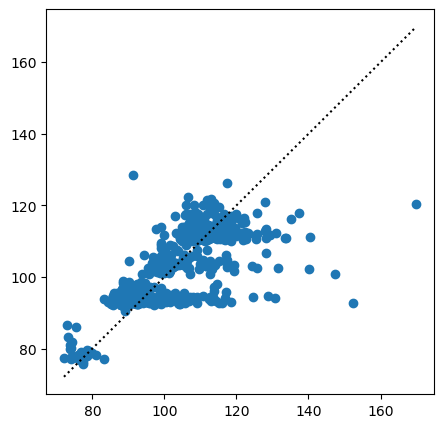

In [95]:
from sklearn.metrics import r2_score

y_pred = regr.predict(X_test)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(y_test, y_pred)
y_min = np.concatenate([y_test, y_pred]).min()
y_max = np.concatenate([y_test, y_pred]).max()
ax.plot([y_min, y_max], [y_min, y_max], c='k', ls='dotted')
print('r2 =', r2_score(y_test, y_pred))

## KFoldでRF

In [113]:
from sklearn.model_selection import KFold

kf_test_pred = []
models = []

kf = KFold(n_splits=5, shuffle=True)
for i, (col_train, col_test) in enumerate(kf.split(Xss, y)):
    X_train = Xss.values[col_train]
    X_test = Xss.values[col_test]
    y_train = y.values[col_train]
    y_test = y.values[col_test]
    
    regr = RandomForestRegressor(max_depth=10, random_state=0)
    regr.fit(X_train, y_train)
    models.append(regr)

    y_pred = regr.predict(X_test)
    kf_test_pred.append((y_test, y_pred))
    print(f'{i} th r2 =', r2_score(y_test, y_pred))

0 th r2 = 0.4381937526394998
1 th r2 = 0.5902694903024817
2 th r2 = 0.5585200760815566
3 th r2 = 0.5706852719909026
4 th r2 = 0.5683347446219866


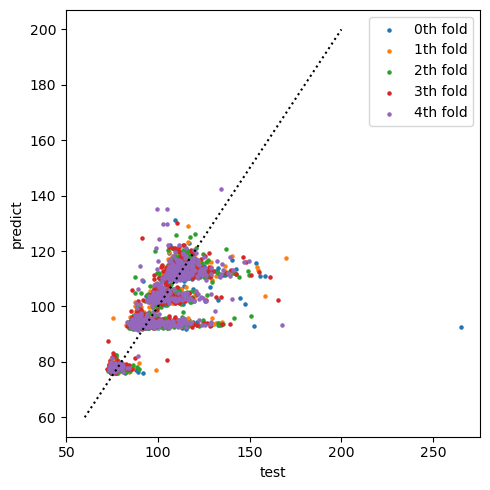

In [115]:
fig, ax = plt.subplots(figsize=(5,5))

for i, (y_test, y_pred) in enumerate(kf_test_pred):
    ax.scatter(y_test, y_pred, label=f'{i}th fold', s=5)
ax.plot([60, 200], [60, 200], c='k', ls='dotted')
ax.legend()
ax.set_xlabel('test')
ax.set_ylabel('predict')
fig.tight_layout()

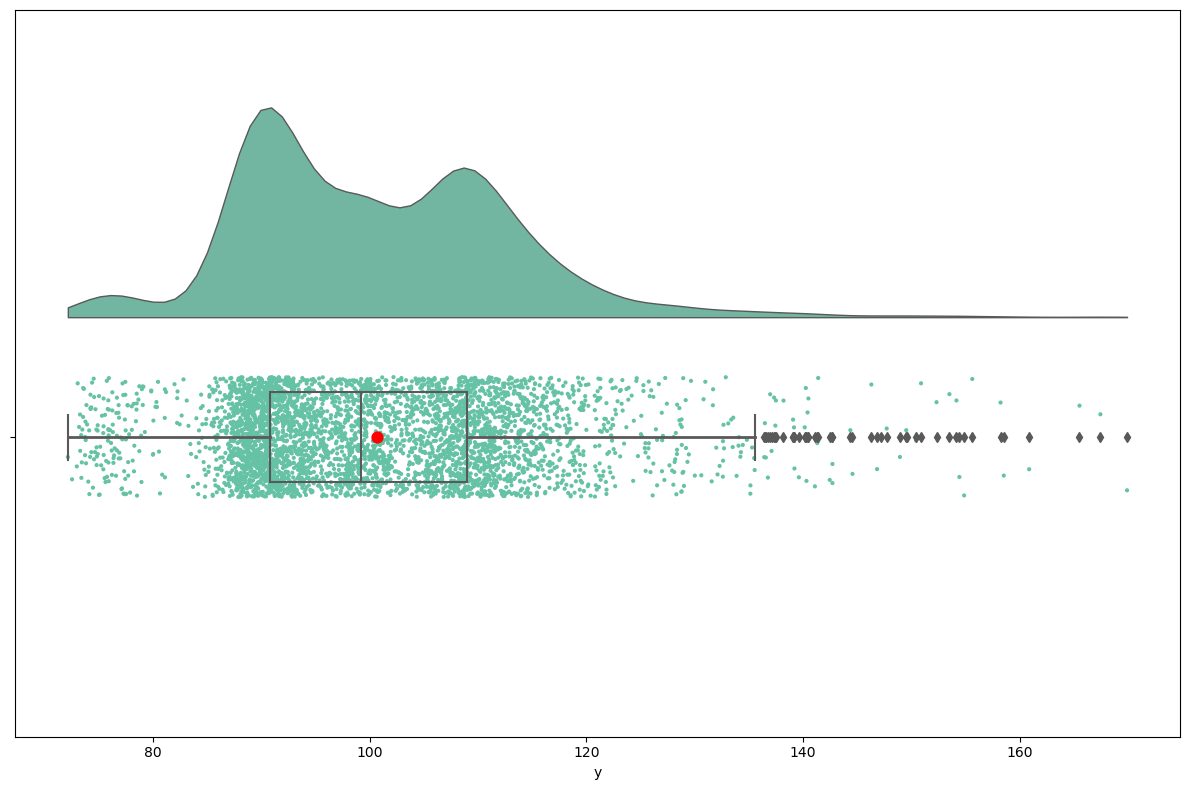

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
pt.RainCloud(ax=ax, y="y", data=df_train.sort_values('y')[:-1], orient="h", pointplot=True)
fig.tight_layout()

山の形状とかを見ると４パターンくらいに分けられそう

In [119]:
fi_list = []
for model in models:
    fi = pd.Series(model.feature_importances_, index=Xss.columns)
    fi_list.append(fi)

<AxesSubplot:>

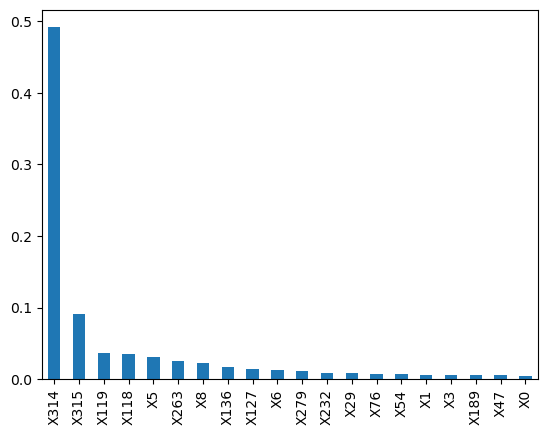

In [130]:
df_fi = pd.DataFrame(fi_list)
ser_fi = df_fi.mean(axis=0).sort_values(ascending=False)
ser_fi = ser_fi[:20]

fig, ax = plt.subplots()
ser_fi.plot.bar(ax=ax)

## LOOでもう少し詳細に因子を解析

In [ ]:
import warnings
warnings.simplefilter('ignore')
import tqdm

"""
models = []
y_test_res = []
y_pred_res = []

for i, index in tqdm.tqdm(enumerate(Xss.index)):
    X_train = Xss.loc[[ind for ind in Xss.index if ind != index]]
    X_test = Xss.loc[index]
    y_train = y[[ind for ind in y.index if ind != index]]
    y_test = y[[index]]
    
    regr = RandomForestRegressor(max_depth=10, random_state=0)
    regr.fit(X_train, y_train)
    models.append(regr)

    y_pred = regr.predict([X_test])
    y_test_res.append(y_test)
    y_pred_res.append(y_pred)
"""

In [151]:
"""
y_test = np.array(y_test_res).T[0]
y_pred = np.array(y_pred_res).T[0]
"""

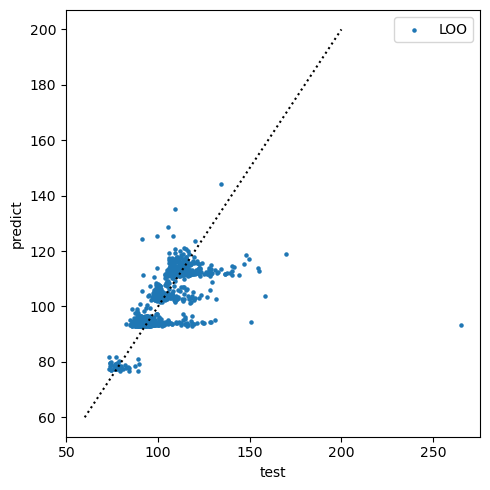

In [152]:
"""
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(y_test, y_pred, label=f'LOO', s=5)
ax.plot([60, 200], [60, 200], c='k', ls='dotted')
ax.legend()
ax.set_xlabel('test')
ax.set_ylabel('predict')
fig.tight_layout()
"""

時間かかるのでLOOはカット

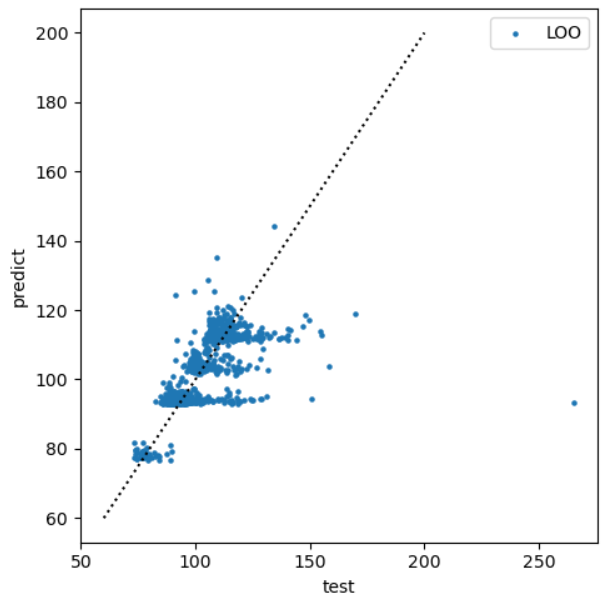

<AxesSubplot:>

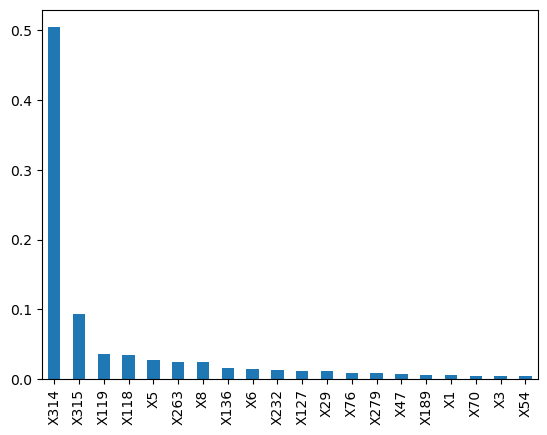

In [153]:
"""
fi_list = []
for model in models:
    fi = pd.Series(model.feature_importances_, index=Xss.columns)
    fi_list.append(fi)
    
df_fi = pd.DataFrame(fi_list)
ser_fi = df_fi.mean(axis=0).sort_values(ascending=False)
ser_fi = ser_fi[:20]

fig, ax = plt.subplots()
ser_fi.plot.bar(ax=ax)
"""

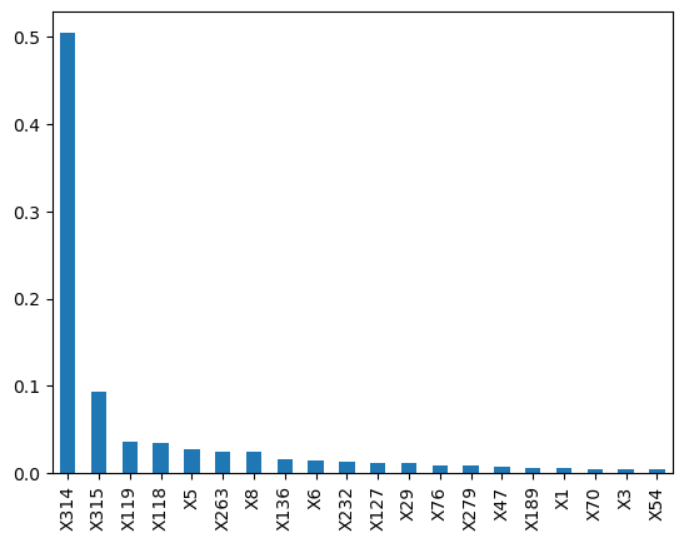

In [160]:
"""
ser_fi.index
"""

Index(['X314', 'X315', 'X119', 'X118', 'X5', 'X263', 'X8', 'X136', 'X6',
       'X232', 'X127', 'X29', 'X76', 'X279', 'X47', 'X189', 'X1', 'X70', 'X3',
       'X54'],
      dtype='object')

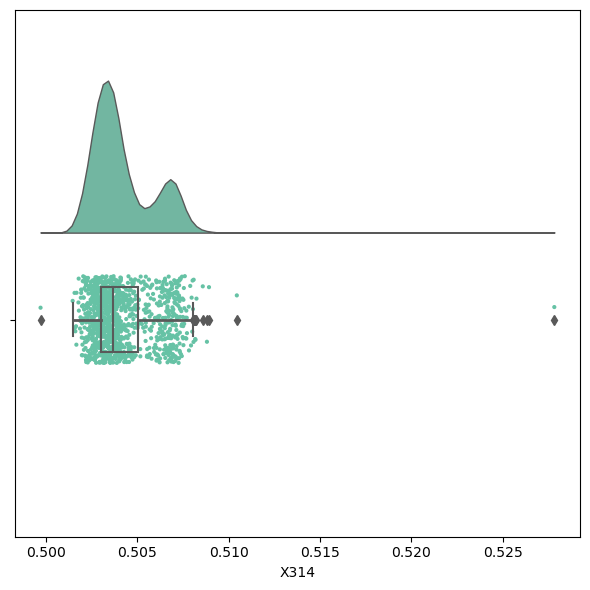

In [170]:
"""
fig, ax = plt.subplots(figsize=(6,6))
pt.RainCloud(ax=ax, y='X314', data=df_fi, orient="h", pointplot=False)
fig.tight_layout()
"""

X314は全体的に必要

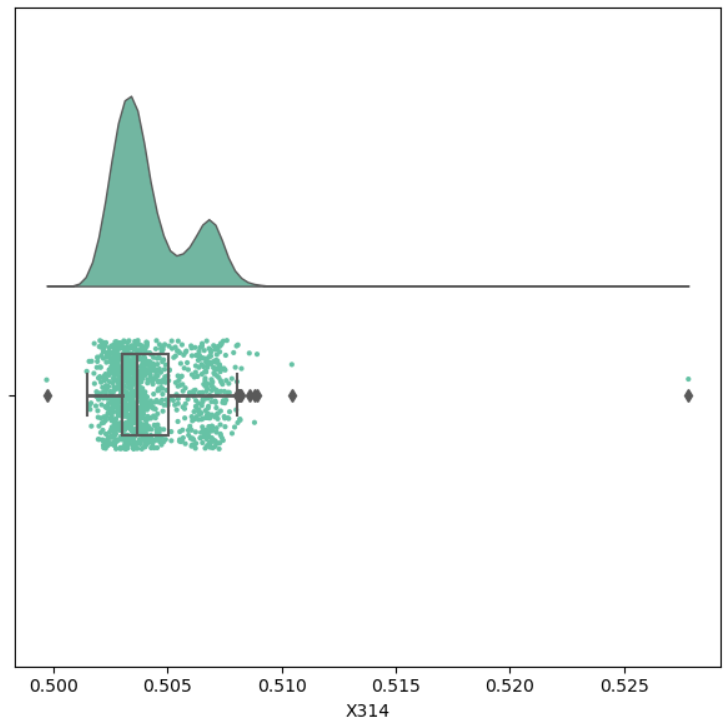

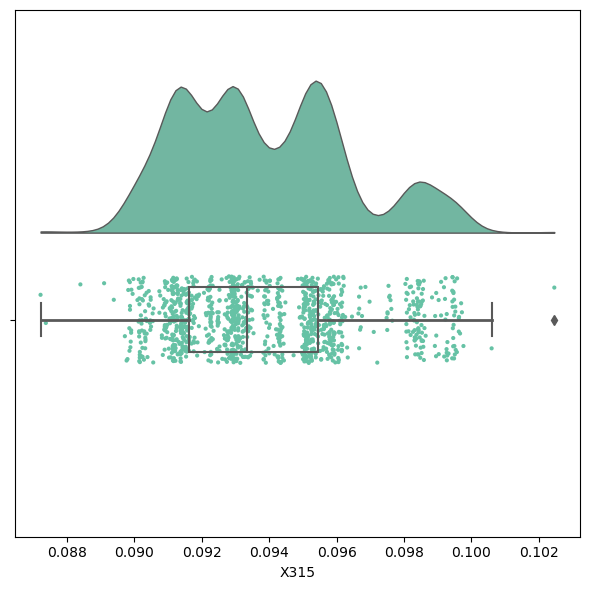

In [173]:
"""
fig, ax = plt.subplots(figsize=(6,6))
pt.RainCloud(ax=ax, y='X315', data=df_fi, orient="h", pointplot=False)
fig.tight_layout()
"""

X315も安定

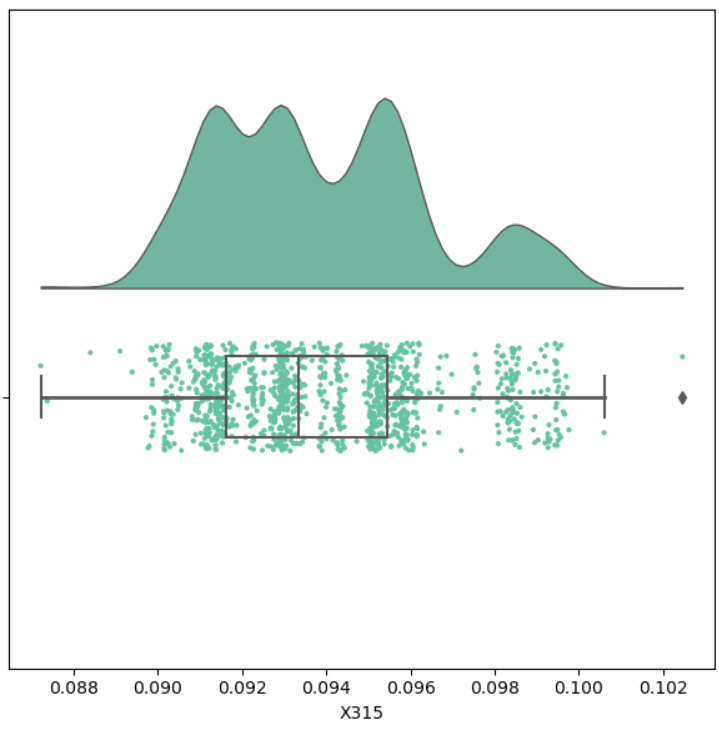

In [174]:
"""
df_cloud = []
for col in ser_fi.index[2:]:
    ser = df_fi[col]
    for val in ser.values:
        df_cloud.append({'categ':col, 'val':val})
df_cloud = pd.DataFrame(df_cloud)
"""

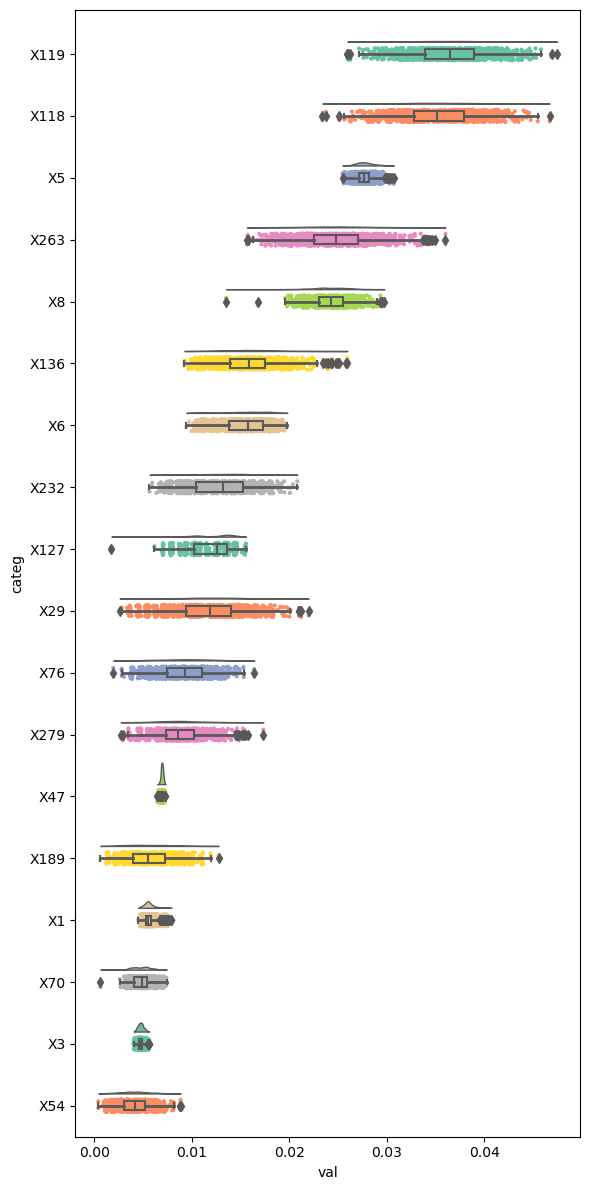

In [175]:
"""
fig, ax = plt.subplots(figsize=(6,12))
pt.RainCloud(ax=ax, y='val', data=df_cloud, x='categ', orient="h", pointplot=False)
fig.tight_layout()
"""

他は烏合

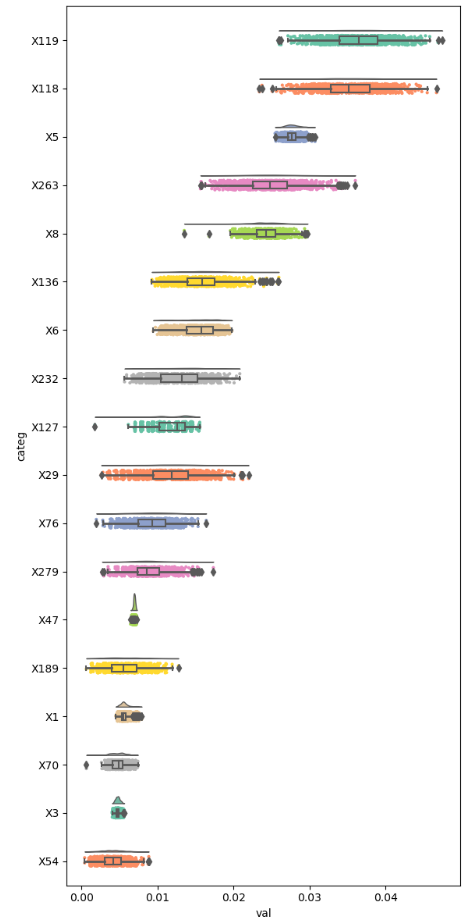

## 寄与度まとめ

- 別格：X315
- そこそこ : X314
- 他にもいくつか

# ちゃんと回帰モデルを作る

[このノート](https://www.kaggle.com/code/dmkravtsov/9-mercedes-with-recursive-feature-elimination/notebook)では、変数"n0"(全パラメータの0の個数)を追加しているので、その比較も実施する

## 方針

- 説明変数
    - アルファベットは数値化
    - 一択のパラメータは除去
    - 正規化を実施
- 目的変数
    - そのまま使用

In [182]:
df_train_converted = df_train.copy()
for col in columns_other:
    df_train_converted[col] = df_train_converted[col].apply(to_num)
df_train_converted = df_train_converted.drop(columns_1_unique, axis=1)
df_train_converted = df_train_converted.set_index('ID')
df_train_converted['n0'] = (df_train_converted.drop('y', axis=1) ==0).sum(axis=1)

In [211]:
ss = MinMaxScaler()

y = df_train_converted.y
X_n0 = df_train_converted.drop('y', axis=1)
X = X_n0.drop('n0', axis=1)

Xss = ss.fit_transform(X)
Xss = pd.DataFrame(Xss, columns=X.columns, index=X.index)

Xss_n0 = ss.fit_transform(X_n0)
Xss_n0 = pd.DataFrame(Xss_n0, columns=X_n0.columns, index=X_n0.index)

## LightGBM で n0なしで回帰

In [212]:
import lightgbm as lgb

# コピペ : https://toukei-lab.com/light-gbm

from sklearn.model_selection import ShuffleSplit

X = Xss.copy()

df_org = pd.concat([X, y], axis=1)

# ふと浮かんできたんです 46という数字が
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=46)

y_test_pred = []
for i, (train_index, test_index) in enumerate(rs.split(df_org)):
    X_df_train = df_org.iloc[train_index]
    X_df_test = df_org.iloc[test_index]
    X_ = X_df_train.drop('y', axis=1)
    y_ = X_df_train.y

    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=46)

    trains = lgb.Dataset(X_train, y_train)
    valids = lgb.Dataset(X_test, y_test)

    params = {
        "objective": "regression",
        "metrics": "mae"
    }

    model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100)
    
    X_test = X_df_test.drop('y', axis=1)
    y_test = X_df_test.y
    y_pred = model.predict(X_test)
    y_test_pred.append((y_test, y_pred))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 2524, number of used features: 249
[LightGBM] [Info] Start training from score 100.537048
[1]	valid_0's l1: 9.13719
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 8.50764
[3]	valid_0's l1: 7.953
[4]	valid_0's l1: 7.4467
[5]	valid_0's l1: 7.03918
[6]	valid_0's l1: 6.69008
[7]	valid_0's l1: 6.39263
[8]	valid_0's l1: 6.14585
[9]	valid_0's l1: 5.94859
[10]	valid_0's l1: 5.79481
[11]	valid_0's l1: 5.65663
[12]	valid_0's l1: 5.56617
[13]	valid_0's l1: 5.49141
[14]	valid_0's l1: 5.42437
[15]	valid_0's l1: 5.37129
[16]	valid_0's l1: 5.33691
[17]	valid_0's l1: 5.31245
[18]	valid_0's l1: 5.28992
[19]	valid_0's l1: 5.26737
[20]	valid_0's l1: 5.23567


r2 = 0.4774149282059824
r2 = 0.6007626954037885
r2 = 0.5728477472254552
r2 = 0.47004696783368327
r2 = 0.5753826325842689


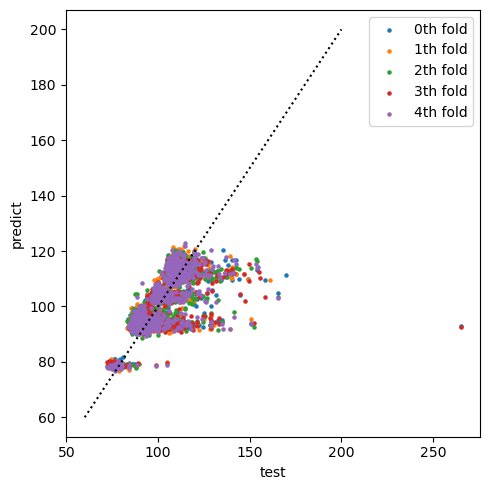

In [213]:
fig, ax = plt.subplots(figsize=(5,5))

for i, (y_test, y_pred) in enumerate(y_test_pred):
    ax.scatter(y_test, y_pred, label=f'{i}th fold', s=5)
    print('r2 =', r2_score(y_test, y_pred))
ax.plot([60, 200], [60, 200], c='k', ls='dotted')
ax.legend()
ax.set_xlabel('test')
ax.set_ylabel('predict')
fig.tight_layout()

In [214]:
y_test, y_pred = np.concatenate(y_test_pred, axis=1)
print('total r2 =', r2_score(y_test, y_pred))

total r2 = 0.5337742687892197


## LightGBM で n0ありで回帰

In [218]:
import lightgbm as lgb

# コピペ : https://toukei-lab.com/light-gbm

from sklearn.model_selection import ShuffleSplit

X = Xss_n0.copy()
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,n0
ID,,,,,,,,,,,,,,,,,,,,,
0,0.185185,0.777778,0.90,0.000000,1.0,0.580645,0.818182,0.583333,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.671875
6,0.185185,0.703704,0.94,0.666667,1.0,0.709677,1.000000,0.583333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656250
7,0.944444,0.814815,0.26,0.333333,1.0,0.677419,0.818182,0.958333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.328125
9,0.944444,0.703704,0.26,0.833333,1.0,0.677419,1.000000,0.166667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
13,0.944444,0.777778,0.26,0.833333,1.0,0.161290,0.272727,0.541667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,0.666667,0.666667,0.88,0.333333,1.0,0.774194,0.272727,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453125
8406,0.166667,0.518519,0.38,0.500000,1.0,0.774194,0.636364,0.291667,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.765625
8412,0.666667,0.777778,0.34,0.000000,1.0,0.774194,0.545455,0.166667,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.515625


In [215]:
df_org = pd.concat([X, y], axis=1)

# ふと浮かんできたんです 46という数字が
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=46)

y_test_pred = []
for i, (train_index, test_index) in enumerate(rs.split(df_org)):
    X_df_train = df_org.iloc[train_index]
    X_df_test = df_org.iloc[test_index]
    X_ = X_df_train.drop('y', axis=1)
    y_ = X_df_train.y

    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=46)

    trains = lgb.Dataset(X_train, y_train)
    valids = lgb.Dataset(X_test, y_test)

    params = {
        "objective": "regression",
        "metrics": "mae"
    }

    model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100)
    
    X_test = X_df_test.drop('y', axis=1)
    y_test = X_df_test.y
    y_pred = model.predict(X_test)
    y_test_pred.append((y_test, y_pred))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 2524, number of used features: 250
[LightGBM] [Info] Start training from score 100.537048
[1]	valid_0's l1: 9.12503
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 8.49906
[3]	valid_0's l1: 7.94288
[4]	valid_0's l1: 7.45765
[5]	valid_0's l1: 7.04793
[6]	valid_0's l1: 6.69891
[7]	valid_0's l1: 6.41001
[8]	valid_0's l1: 6.16602
[9]	valid_0's l1: 5.96327
[10]	valid_0's l1: 5.80673
[11]	valid_0's l1: 5.68765
[12]	valid_0's l1: 5.59582
[13]	valid_0's l1: 5.53166
[14]	valid_0's l1: 5.47418
[15]	valid_0's l1: 5.42365
[16]	valid_0's l1: 5.38936
[17]	valid_0's l1: 5.36427
[18]	valid_0's l1: 5.34199
[19]	valid_0's l1: 5.31798
[20]	valid_0's l1: 5.302

r2 = 0.4786661163736866
r2 = 0.5983419332673472
r2 = 0.5740023219252597
r2 = 0.4670036295194905
r2 = 0.5794200413053521


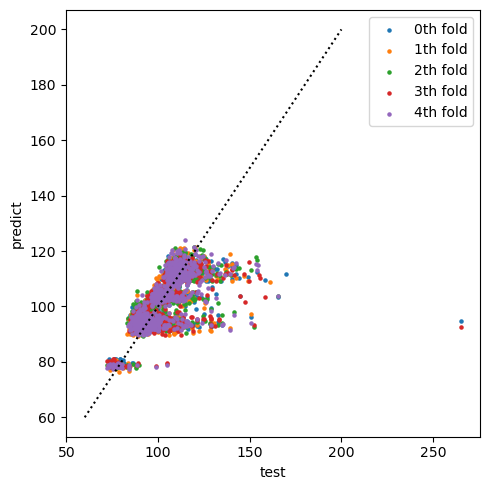

In [216]:
fig, ax = plt.subplots(figsize=(5,5))

for i, (y_test, y_pred) in enumerate(y_test_pred):
    ax.scatter(y_test, y_pred, label=f'{i}th fold', s=5)
    print('r2 =', r2_score(y_test, y_pred))
ax.plot([60, 200], [60, 200], c='k', ls='dotted')
ax.legend()
ax.set_xlabel('test')
ax.set_ylabel('predict')
fig.tight_layout()

In [217]:
y_test, y_pred = np.concatenate(y_test_pred, axis=1)
print('total r2 =', r2_score(y_test, y_pred))

total r2 = 0.5338778603594685


# LightGBMまとめ

- n0の追加は変わらない？
- スコアは0.53
- よくわからないので追加なしでやってみる

# 提出用のノートの作成

Kaggleでは最終的にモデルをSubmissionし、配布されていないデータの回帰を行いそのスコアを競う。その提出方法の把握を目的として、上記のLightGBMモデルを提出してみる。

In [222]:
sample_submit = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip')
df_submit = pd.read_csv('/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip')

## 先ほどと同じ方法で加工していく

In [226]:
df_train_converted = df_train.copy()
for col in columns_other:
    df_train_converted[col] = df_train_converted[col].apply(to_num)
df_train_converted = df_train_converted.drop(columns_1_unique, axis=1)
df_train_converted = df_train_converted.set_index('ID')
df_train_converted['n0'] = (df_train_converted.drop('y', axis=1) ==0).sum(axis=1)

In [227]:
df_submit_converted = df_submit.copy()
for col in columns_other:
    df_submit_converted[col] = df_submit_converted[col].apply(to_num)
df_submit_converted = df_submit_converted.drop(columns_1_unique, axis=1)
df_submit_converted = df_submit_converted.set_index('ID')
df_submit_converted['n0'] = (df_submit_converted ==0).sum(axis=1)

In [228]:
ss = MinMaxScaler()

y = df_train_converted.y
X_n0 = df_train_converted.drop('y', axis=1)
X = X_n0.drop('n0', axis=1)

Xss = ss.fit_transform(X)
Xss = pd.DataFrame(Xss, columns=X.columns, index=X.index)

Xss_n0 = ss.fit_transform(X_n0)
Xss_n0 = pd.DataFrame(Xss_n0, columns=X_n0.columns, index=X_n0.index)

In [229]:
X_n0_sub = df_submit_converted.copy()
X_sub = X_n0_sub.drop('n0', axis=1)

Xss_sub = ss.fit_transform(X_sub)
Xss_sub = pd.DataFrame(Xss_sub, columns=X_sub.columns, index=X_sub.index)

Xss_n0_sub = ss.fit_transform(X_n0_sub)
Xss_n0_sub = pd.DataFrame(Xss_n0_sub, columns=X_n0_sub.columns, index=X_n0_sub.index)

In [223]:
df_submit

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [231]:
X = Xss_n0.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

trains = lgb.Dataset(X_train, y_train)
valids = lgb.Dataset(X_test, y_test)

params = {
    "objective": "regression",
    "metrics": "mae"
}

model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, early_stopping_rounds=100)

y_n0_sub = model.predict(Xss_n0_sub)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 3367, number of used features: 265
[LightGBM] [Info] Start training from score 100.587404
[1]	valid_0's l1: 9.7704
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 9.12728
[3]	valid_0's l1: 8.56427
[4]	valid_0's l1: 8.08235
[5]	valid_0's l1: 7.66748
[6]	valid_0's l1: 7.31018
[7]	valid_0's l1: 7.00918
[8]	valid_0's l1: 6.76526
[9]	valid_0's l1: 6.57152
[10]	valid_0's l1: 6.41575
[11]	valid_0's l1: 6.28791
[12]	valid_0's l1: 6.19366
[13]	valid_0's l1: 6.11224
[14]	valid_0's l1: 6.04962
[15]	valid_0's l1: 6.00328
[16]	valid_0's l1: 5.96085
[17]	valid_0's l1: 5.92613
[18]	valid_0's l1: 5.8924
[19]	valid_0's l1: 5.86458
[20]	valid_0's l1: 5.84415

sampleと同じ形式に加工

In [235]:
sample_submit

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318
...,...,...
4204,8410,100.669318
4205,8411,100.669318
4206,8413,100.669318
4207,8414,100.669318


In [241]:
ans = []
for n, id_ in enumerate(df_submit_converted.index):
    ans.append({'ID':id_, 'y':y_n0_sub[n]})
ans_submit = pd.DataFrame(ans)
ans_submit

,ID,y
0,1,79.180942
1,2,93.486016
2,3,79.115761
3,4,78.872720
4,5,114.294211
...,...,...
4204,8410,103.256991
4205,8411,92.201694
4206,8413,93.552055
4207,8414,110.233291


In [244]:
ans_submit.to_csv('submission.csv', index=False)

In [245]:
pd.read_csv('submission.csv')

,ID,y
0,1,79.180942
1,2,93.486016
2,3,79.115761
3,4,78.872720
4,5,114.294211
...,...,...
4204,8410,103.256991
4205,8411,92.201694
4206,8413,93.552055
4207,8414,110.233291
